In [423]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.preprocessing import binarize

In [424]:
dataset = pd.read_csv('untitled text 4.csv')

In [425]:
dataset.columns=['age','sex','chestPain','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [426]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
age          302 non-null float64
sex          302 non-null float64
chestPain    302 non-null float64
trestbps     302 non-null float64
chol         302 non-null float64
fbs          302 non-null float64
restecg      302 non-null float64
thalach      302 non-null float64
exang        302 non-null float64
oldpeak      302 non-null float64
slope        302 non-null float64
ca           302 non-null object
thal         302 non-null object
num          302 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.1+ KB


In [427]:
dataset.head()

,age,sex,chestPain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [428]:
dataset.isnull().sum()

age          0
sex          0
chestPain    0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
num          0
dtype: int64

In [429]:
dataset.describe()

,age,sex,chestPain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


###### distributing age into categories..

In [430]:
age_m=[]
for age in dataset.age:
    if age<30:
         age_m.append('<30')
    else:
        if age<40:
            age_m.append('30-40')
        else:
            if age<50:
                age_m.append('40-50')
            else:
                if age<60:
                    age_m.append('50-60')
                else:
                    if age<70:
                        age_m.append('60-70')
                    else:
                         if age<80:
                            age_m.append('70-80')

In [431]:
dataset.insert(1,'age_m',age_m)

In [432]:
dataset.drop(labels='age',axis=1,inplace=True)

In [433]:
dataset['age_m'].unique()

array(['60-70', '30-40', '40-50', '50-60', '70-80', '<30'], dtype=object)

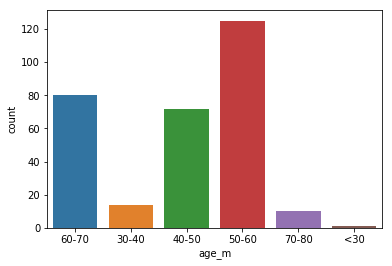

In [434]:
sns.countplot(dataset['age_m'])

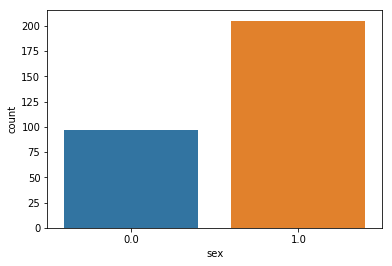

In [435]:
sns.countplot(dataset.sex)

In [436]:
dataset.chestPain.unique()

array([4., 3., 2., 1.])

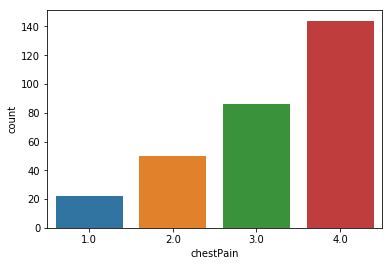

In [437]:
sns.countplot(dataset.chestPain)

In [438]:
dataset.trestbps.unique()

array([160., 120., 130., 140., 172., 150., 110., 132., 117., 135., 112.,
       105., 124., 125., 142., 128., 145., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.])

In [439]:
dataset.trestbps.min()

94.0

In [440]:
#dividing resting bp into categories
bp_m = []
for bp in dataset.trestbps:
    if bp<125:
        bp_m.append('ideal bp')
    else:
        if bp<142:
            bp_m.append('pre_high bp')
        else:
            if bp<300:
                bp_m.append('high bp')

In [441]:
dataset.insert(4,'tresbps_m',bp_m)

In [442]:
dataset.drop(labels='trestbps',axis=1,inplace=True)

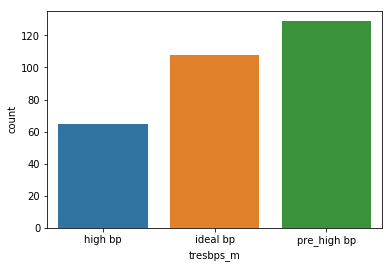

In [443]:
sns.countplot(dataset.tresbps_m)

In [444]:
dataset.chol.unique()

array([286., 229., 250., 204., 236., 268., 354., 254., 203., 192., 294.,
       256., 263., 199., 168., 239., 275., 266., 211., 283., 284., 224.,
       206., 219., 340., 226., 247., 167., 230., 335., 234., 233., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [445]:
#dividing cholestrol into 3 categories.
chol_m = []
for bp in dataset.chol:
    if bp<205:
        chol_m.append('desirable')
    else:
        if bp<243:
            chol_m.append('border high')
        else:
            if bp<600:
                chol_m.append('high')

In [446]:
dataset.insert(4,'chol_m',chol_m)

In [447]:
dataset.drop(labels='chol',axis=1,inplace=True)

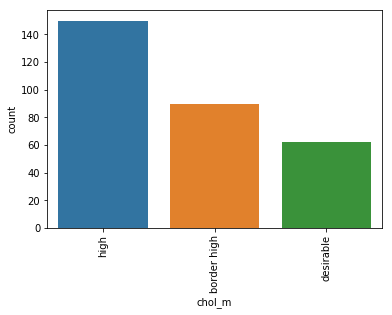

In [448]:
plt.xticks(rotation=90)
sns.countplot(dataset.chol_m)

In [449]:
dataset.fbs.unique()

array([0., 1.])

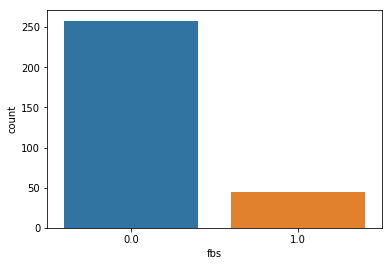

In [450]:
sns.countplot(dataset.fbs)
#fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

In [451]:
dataset.restecg.unique()

array([2., 0., 1.])

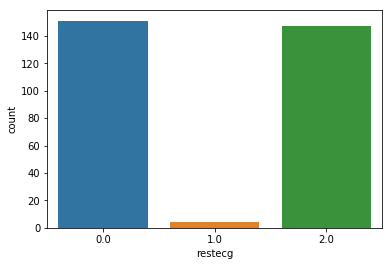

In [452]:
#restecg: resting electrocardiographic results 
# Value 0: normal 
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
sns.countplot(dataset.restecg)

In [453]:
dataset.thalach.unique()
#thalach: maximum heart rate achieved

array([108., 129., 187., 172., 178., 160., 163., 147., 155., 148., 153.,
       142., 173., 162., 174., 168., 139., 171., 144., 132., 158., 114.,
       151., 161., 179., 120., 112., 137., 157., 169., 165., 123., 128.,
       152., 140., 188., 109., 125., 131., 170., 113.,  99., 177., 141.,
       180., 111., 143., 182., 150., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.])

In [454]:
#dividing maximum heart rate into categories
thalach_m = []
for bp in dataset.thalach:
    if bp<102:
        thalach_m.append('normal')
    else:
        if bp<140:
            thalach_m.append('pre high')
        else:
            if bp<250:
                thalach_m.append('high')

In [455]:
dataset.insert(7,'thalach_m',thalach_m)

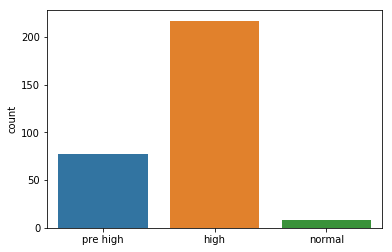

In [456]:
sns.countplot(thalach_m)

In [457]:
dataset.exang.unique()
#38 exang: exercise induced angina (1 = yes; 0 = no) 

array([1., 0.])

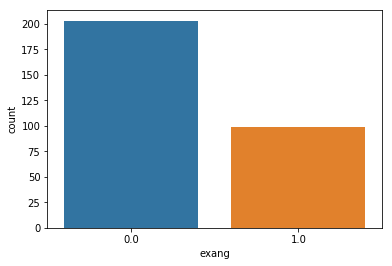

In [458]:
sns.countplot(dataset.exang)

In [459]:
dataset.oldpeak.unique()
#oldpeak = ST depression induced by exercise relative to rest 

array([1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5, 1.6,
       1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4, 6.2,
       4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3, 2.3,
       4.4])

In [460]:
oldpk = []
for i in dataset.oldpeak:
    if i<1.9:
        oldpk.append('non-sig')
    else:
        if i>=1.9:
            oldpk.append('significant')

In [461]:
dataset.insert(10,'oldpk',oldpk)

In [462]:
dataset.drop(labels='thalach',axis=1,inplace=True)

In [463]:
dataset.drop(labels='oldpeak',axis=1,inplace=True)

In [464]:
dataset.slope.unique()
# slope: the slope of the peak exercise ST segment 
#Value 1: upsloping 
# Value 2: flat 
# Value 3: downsloping 

array([2., 3., 1.])

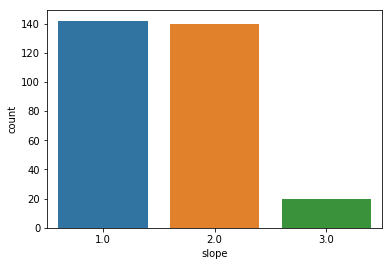

In [465]:
sns.countplot(dataset.slope)

In [466]:
dataset.ca.unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [467]:
dataset.ca.replace('?',dataset.ca.mode()[0],inplace=True)

In [468]:
dataset.ca.unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

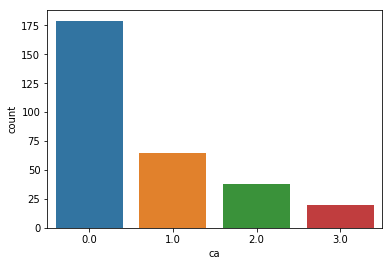

In [469]:
sns.countplot(dataset.ca)

In [470]:
dataset.thal.unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [471]:
dataset.thal.replace('?',dataset.thal.mode()[0],inplace=True)

In [472]:
dataset.thal.unique()

array(['3.0', '7.0', '6.0'], dtype=object)

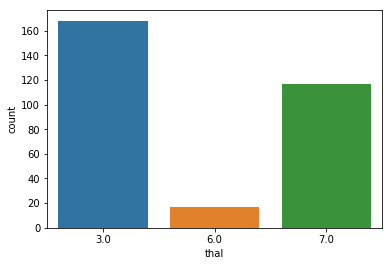

In [473]:
sns.countplot(dataset.thal)

In [474]:
dataset.num.unique()

array([2, 1, 0, 3, 4])

In [475]:
#as described in description of the dataset,categorising label in 0 and 1.
num_m=[]
for i in dataset.num:
    if i==0:
        num_m.append('0')
    else:
        if i>0:
            num_m.append('1')

In [476]:
dataset.insert(13,'num_m',num_m)

In [477]:
dataset.drop('num',inplace=True,axis=1)

In [478]:
dataset.head()

,age_m,sex,chestPain,tresbps_m,chol_m,fbs,restecg,thalach_m,exang,oldpk,slope,ca,thal,num_m
0,60-70,1.0,4.0,high bp,high,0.0,2.0,pre high,1.0,non-sig,2.0,3.0,3.0,1
1,60-70,1.0,4.0,ideal bp,border high,0.0,2.0,pre high,1.0,significant,2.0,2.0,7.0,1
2,30-40,1.0,3.0,pre_high bp,high,0.0,0.0,high,0.0,significant,3.0,0.0,3.0,0
3,40-50,0.0,2.0,pre_high bp,desirable,0.0,2.0,high,0.0,non-sig,1.0,0.0,3.0,0
4,50-60,1.0,2.0,ideal bp,border high,0.0,0.0,high,0.0,non-sig,1.0,0.0,3.0,0


In [479]:
dataset.corr()
#this is a non-correlated data...

,sex,chestPain,fbs,restecg,exang,slope
sex,1.000000,0.015342,0.042863,0.019386,0.148019,0.032671
chestPain,0.015342,1.000000,-0.022524,0.075854,0.382394,0.171926
fbs,0.042863,-0.022524,1.000000,0.062202,0.031514,0.042630
restecg,0.019386,0.075854,0.062202,1.000000,0.087432,0.127603
exang,0.148019,0.382394,0.031514,0.087432,1.000000,0.265491
slope,0.032671,0.171926,0.042630,0.127603,0.265491,1.000000


###### Now doing Bivariate Analysis

Text(0,0.5,'percentage of income categ')

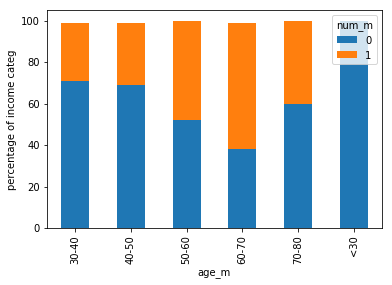

In [480]:
diff_catg_count=dataset['age_m'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['age_m','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [481]:
#since distribution is same in category 30-40 and 40-50 so we can combine them.
dataset['age_m'].replace('30-40','40-50',inplace=True)

Text(0,0.5,'percentage of income categ')

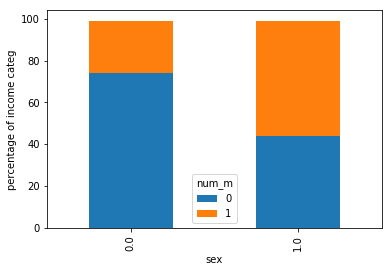

In [482]:
diff_catg_count=dataset['sex'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['sex','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0,0.5,'percentage of income categ')

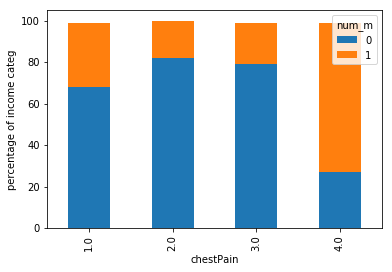

In [483]:
diff_catg_count=dataset['chestPain'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['chestPain','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [484]:
dataset.chestPain.replace('2.0','3.0',inplace=True)

Text(0,0.5,'percentage of income categ')

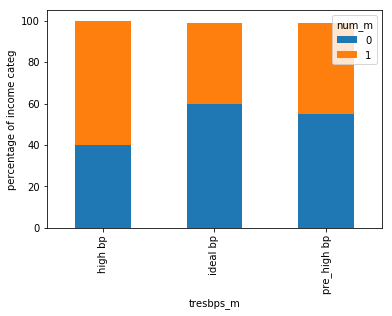

In [485]:
diff_catg_count=dataset['tresbps_m'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['tresbps_m','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0,0.5,'percentage of income categ')

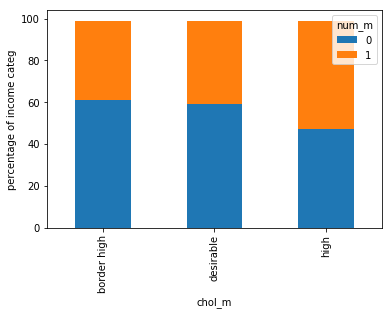

In [486]:
diff_catg_count=dataset['chol_m'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['chol_m','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [487]:
dataset['chol_m'].replace('desirable','border high',inplace=True)

In [488]:
dataset.head()

,age_m,sex,chestPain,tresbps_m,chol_m,fbs,restecg,thalach_m,exang,oldpk,slope,ca,thal,num_m
0,60-70,1.0,4.0,high bp,high,0.0,2.0,pre high,1.0,non-sig,2.0,3.0,3.0,1
1,60-70,1.0,4.0,ideal bp,border high,0.0,2.0,pre high,1.0,significant,2.0,2.0,7.0,1
2,40-50,1.0,3.0,pre_high bp,high,0.0,0.0,high,0.0,significant,3.0,0.0,3.0,0
3,40-50,0.0,2.0,pre_high bp,border high,0.0,2.0,high,0.0,non-sig,1.0,0.0,3.0,0
4,50-60,1.0,2.0,ideal bp,border high,0.0,0.0,high,0.0,non-sig,1.0,0.0,3.0,0


Text(0,0.5,'percentage of income categ')

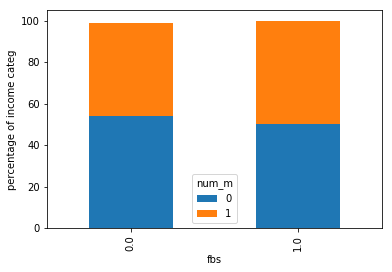

In [489]:
diff_catg_count=dataset['fbs'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['fbs','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [490]:
dataset.drop(labels='fbs',axis=1,inplace=True)

Text(0,0.5,'percentage of income categ')

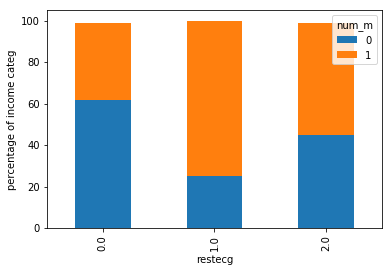

In [491]:
diff_catg_count=dataset['restecg'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['restecg','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0,0.5,'percentage of income categ')

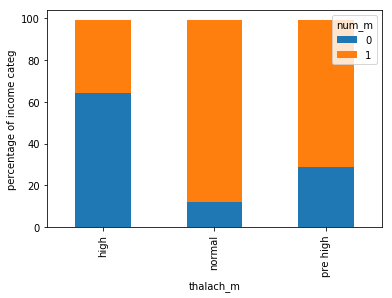

In [492]:
diff_catg_count=dataset['thalach_m'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['thalach_m','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0,0.5,'percentage of income categ')

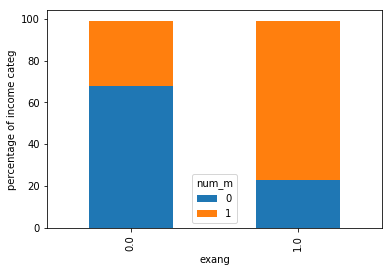

In [493]:
diff_catg_count=dataset['exang'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['exang','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0,0.5,'percentage of income categ')

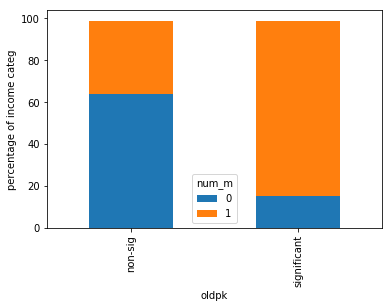

In [494]:
diff_catg_count=dataset['oldpk'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['oldpk','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0,0.5,'percentage of income categ')

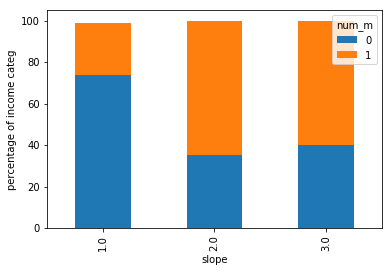

In [495]:
diff_catg_count=dataset['slope'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['slope','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0,0.5,'percentage of income categ')

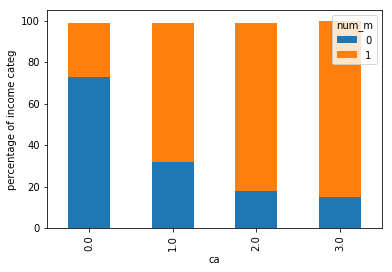

In [496]:
diff_catg_count=dataset['ca'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['ca','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

Text(0,0.5,'percentage of income categ')

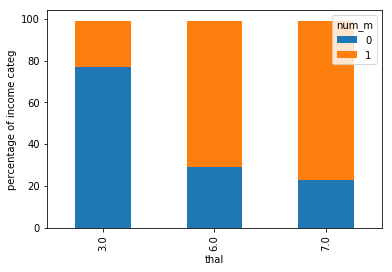

In [497]:
diff_catg_count=dataset['thal'].value_counts()
#diff_catg_count will give series with labels as categries of age_m and associated data as no. of counts of that label
p=dataset.groupby(['thal','num_m']).size()
#p is series
for categ in p.index.levels[0]:
    for i in p[categ].index:
        p[categ][i]=p[categ][i]/diff_catg_count[categ]*100
p.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of income categ')

In [499]:
features=list(dataset.columns)
features.remove('num_m')
X=dataset[features].copy()
Y=dataset['num_m']

###### Label Encoding

In [500]:
lb = preprocessing.LabelEncoder()
for feature in features:
    X[feature]=lb.fit_transform(X[feature])

###### One Hot Encoding

In [501]:
X=pd.get_dummies(X,columns=features)

In [502]:
dataset.columns

Index(['age_m', 'sex', 'chestPain', 'tresbps_m', 'chol_m', 'restecg',
       'thalach_m', 'exang', 'oldpk', 'slope', 'ca', 'thal', 'num_m'],
      dtype='object')

###### Train Test Split

In [503]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=9)

###### Building Model

In [504]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [505]:
logreg.score(train_x,train_y)

0.8796680497925311

In [507]:
predicted_y=logreg.predict(test_x)
print(classification_report(test_y,predicted_y))
print('accuracy_score is on test data: ',accuracy_score(test_y,predicted_y))

             precision    recall  f1-score   support

          0       0.82      0.90      0.86        31
          1       0.89      0.80      0.84        30

avg / total       0.86      0.85      0.85        61

accuracy_score is on test data:  0.8524590163934426


Text(0.5,24,'predicted class')

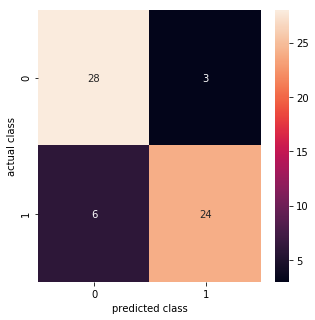

In [509]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(test_y,predicted_y),annot=True,fmt='.5g')
plt.ylabel('actual class')
plt.xlabel('predicted class')